In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
slr=pd.read_csv('delivery_time.csv')

## EDA

In [4]:
slr.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
slr.tail()


,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
slr.shape

(21, 2)

In [7]:
slr.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# **Plotting the data to check for outliers**


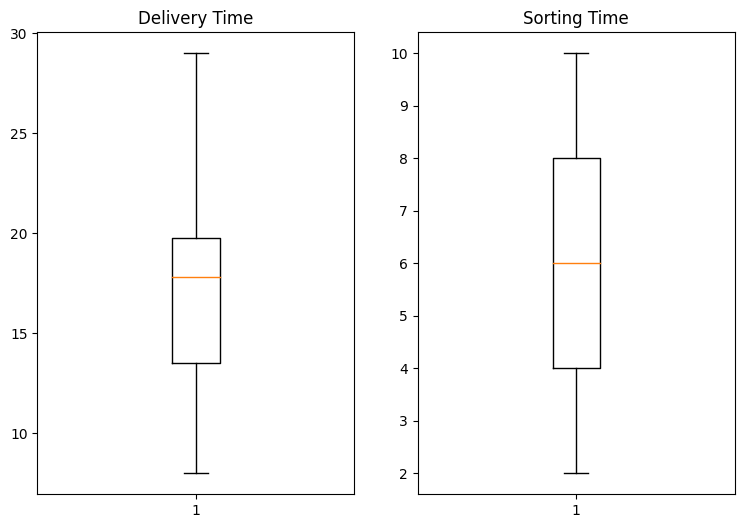

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(slr['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(slr['Sorting Time'])
plt.title('Sorting Time')
plt.show()


# As you can see there are no Outliers in the data


# **Checking the Correlation between variables**


In [13]:
slr.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# As you can see There is good correlation between the two variables.

# Therefore the score is more than 0.8 which is good sign.

# Columns Renaming

In [14]:
slr=slr.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)

# **Visualization of Correlation beteen x and y**


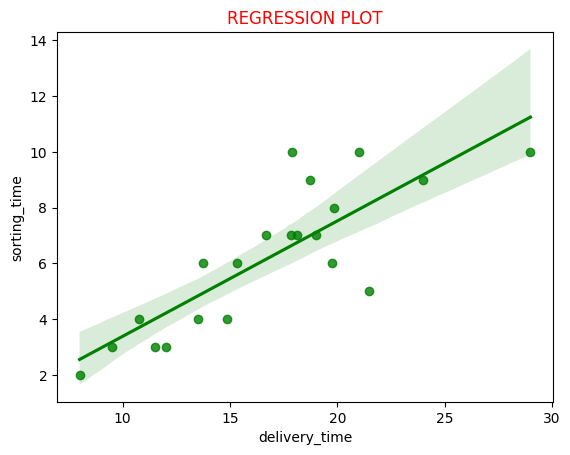

In [17]:
sns.regplot(x=slr['delivery_time'],y=slr['sorting_time'],color='green')
plt.title('REGRESSION PLOT',color='red')
plt.show()

# Data Visualization

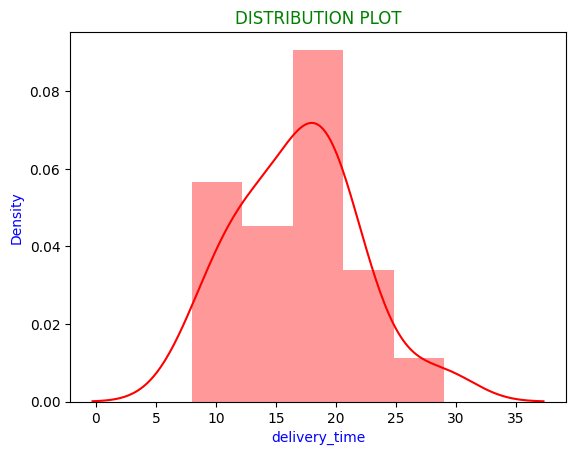

In [18]:
sns.distplot(slr['delivery_time'],color='red')
plt.xlabel('delivery_time',color='blue')
plt.ylabel('Density',color='blue')
plt.title('DISTRIBUTION PLOT',color='green')
plt.show()

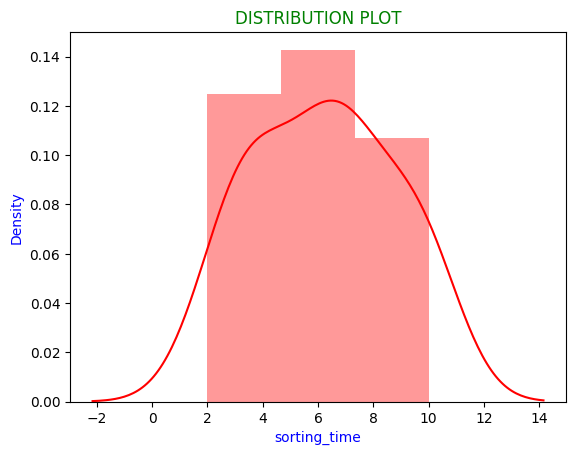

In [19]:
sns.distplot(slr['sorting_time'],color='red')
plt.xlabel('sorting_time',color='blue')
plt.ylabel('Density',color='blue')
plt.title('DISTRIBUTION PLOT',color='green')
plt.show()

# Trying different transformation of data to estimate normal distribution and to remove any skewness

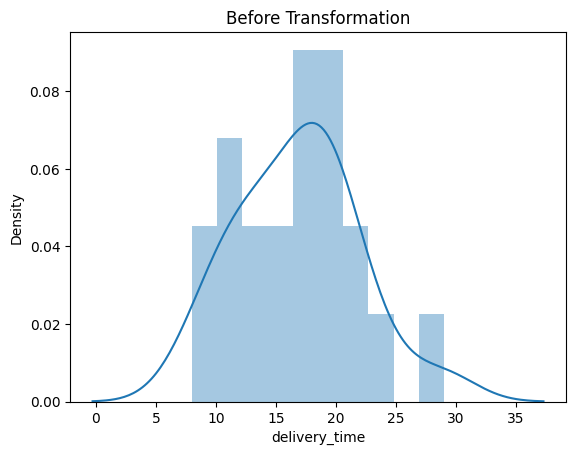

In [20]:
sns.distplot(slr['delivery_time'],bins = 10,kde = True)
plt.title('Before Transformation')
plt.show()

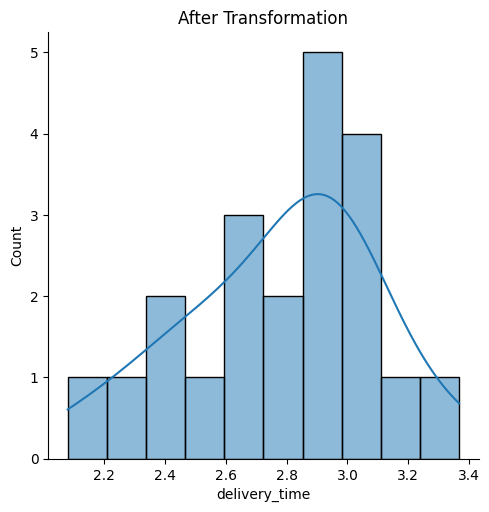

In [21]:
sns.displot(np.log(slr['delivery_time']),bins = 10,kde = True)
plt.title('After Transformation')
plt.show()

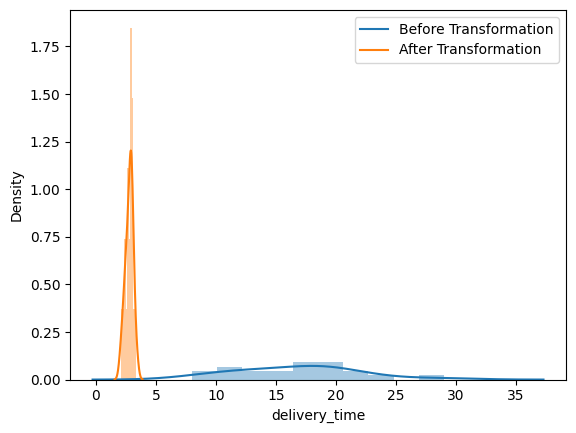

In [22]:
labels=['Before Transformation','After Transformation']
sns.distplot(slr['delivery_time'],bins = 10,kde = True)
sns.distplot(np.log(slr['delivery_time']),bins = 10,kde = True)
plt.legend(labels)
plt.show()

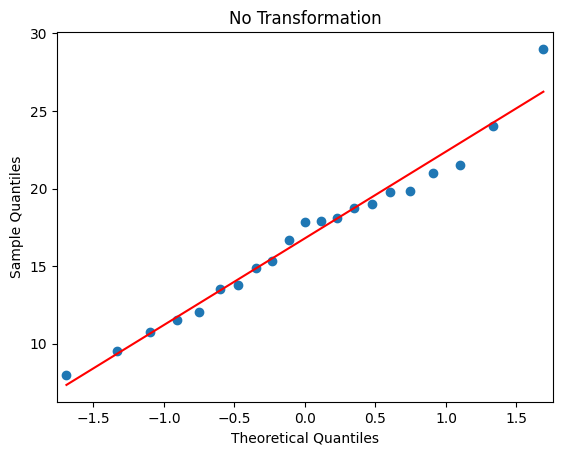

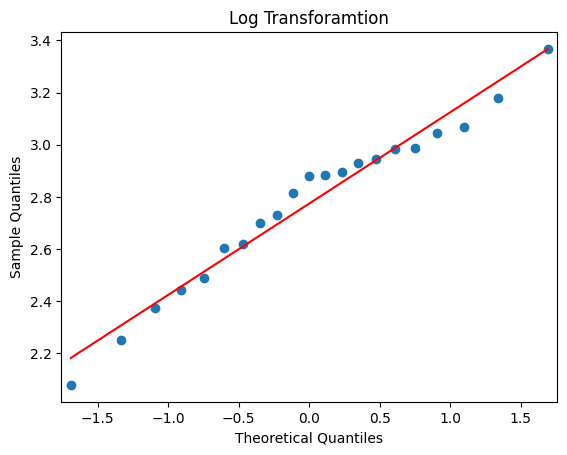

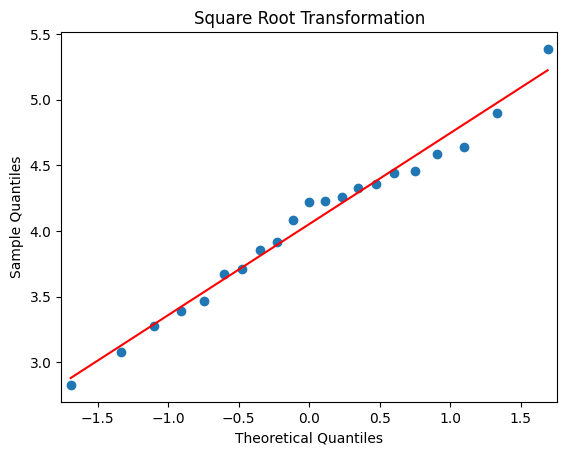

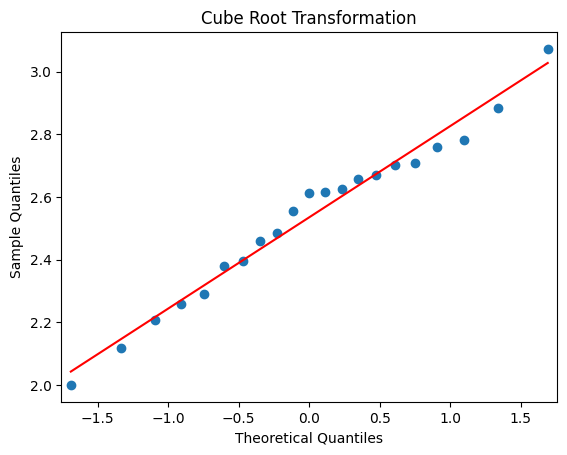

In [23]:
sm.qqplot(slr['delivery_time'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(slr['delivery_time']),line='r')
plt.title('Log Transforamtion')
sm.qqplot(np.sqrt(slr['delivery_time']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(slr['delivery_time']),line='r')
plt.title('Cube Root Transformation')
plt.show()

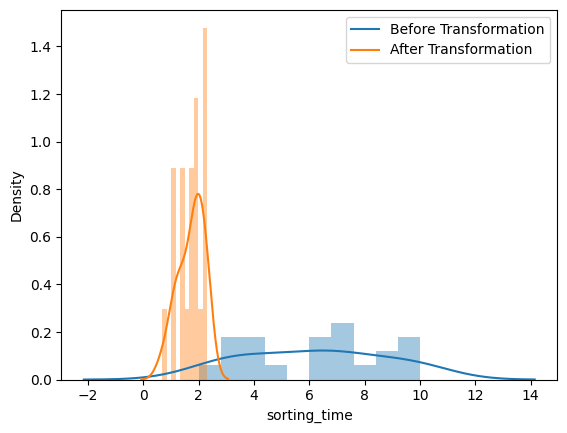

In [24]:
labels=['Before Transformation','After Transformation']
sns.distplot(slr['sorting_time'],bins = 10,kde = True)
sns.distplot(np.log(slr['sorting_time']),bins = 10,kde = True)
plt.legend(labels)
plt.show()

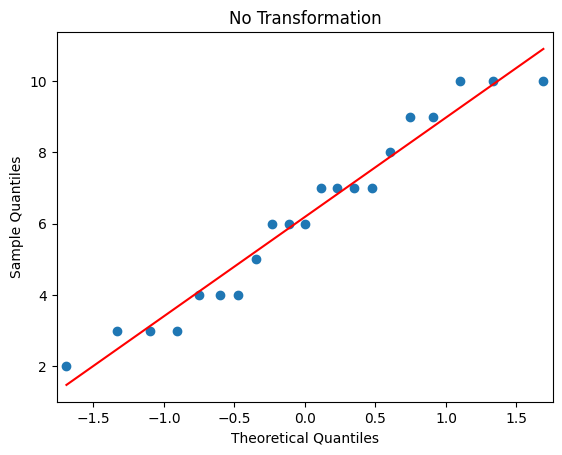

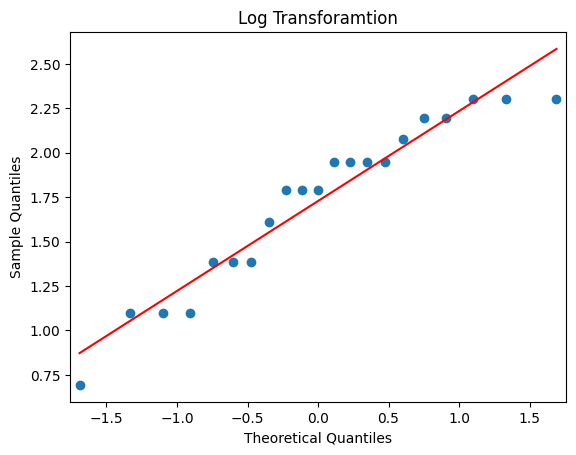

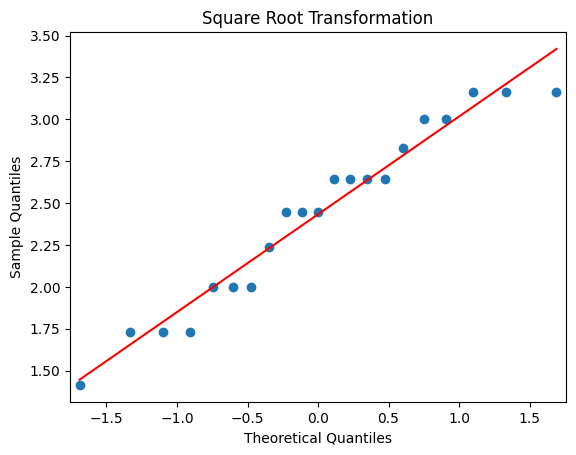

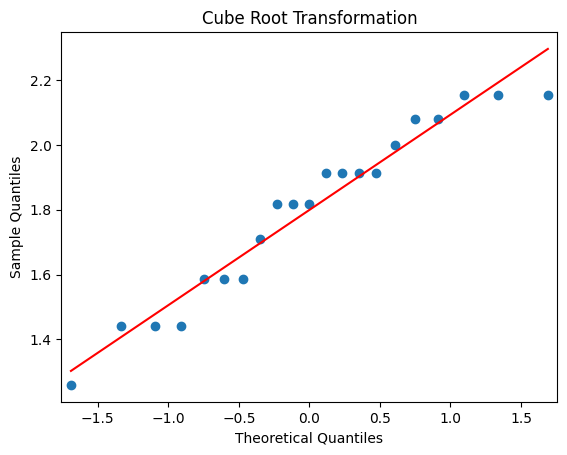

In [25]:
sm.qqplot(slr['sorting_time'],line='r')
plt.title('No Transformation')
sm.qqplot(np.log(slr['sorting_time']),line='r')
plt.title('Log Transforamtion')
sm.qqplot(np.sqrt(slr['sorting_time']),line='r')
plt.title('Square Root Transformation')
sm.qqplot(np.cbrt(slr['sorting_time']),line='r')
plt.title('Cube Root Transformation')
plt.show()

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression


In [26]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = slr).fit()

In [27]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [28]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# As you can notice in the above model

# The R-squared and Adjusted R-squared scores are still below 0.85.

# (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

# Lets Try some data transformation to check whether these scores can get any higher than this.

# **Square Root transformation on data**


In [29]:
model1 = smf.ols("np.sqrt(delivery_time)~np.sqrt(sorting_time)",data = slr).fit()

In [30]:
model1.params

Intercept                1.613479
np.sqrt(sorting_time)    1.002217
dtype: float64

In [31]:
(model1.rsquared,model1.rsquared_adj)

(0.7292011987544665, 0.7149486302678596)

# Adjusted R-squared scores have increased but they are still below 0.85

# Lets Try other data transformation to check whether these scores can get any higher than this.


# **Cube Root transformation on Data**


In [32]:
model2 = smf.ols("np.cbrt(delivery_time)~np.cbrt(sorting_time)",data = slr).fit()

In [33]:
model2.params

Intercept                1.013571
np.cbrt(sorting_time)    0.845585
dtype: float64

In [34]:
(model2.rsquared,model2.rsquared_adj)

(0.7441167577566266, 0.7306492186911859)

#  Adjusted R-squared scores have increased but they are still below 0.85

# Lets Try other data transformation to check whether these scores can get any higher than this.


# **Log transformation on Data**


In [35]:
model3 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data = slr).fit()

In [36]:
model3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [37]:
(model3.rsquared,model3.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# ***After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model***

# ***Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction***.

# ***Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here***.


# **As we can see Model3 has higest Adjuste R-Square and R-Square among the other Model**.

# **So we can use Model3 of Log Transformation to predict Values**



# Predicting values from Model with Log Transformation on the Data


In [38]:
predicted = pd.DataFrame()
predicted['sorting_time'] = slr.sorting_time
predicted['delivery_Time'] = slr.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model3.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


# **Predicitng from Original Model without any data transformation**


In [39]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = slr.sorting_time
predicted1['delivery_Time'] = slr.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1


,sorting_time,delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [40]:
(model3.rsquared,model3.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [41]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)